# Visualization of data and simulations

In this notebook, we illustrate the visualization functions of petab.

In [1]:
from petab.visualize import plot_data_and_simulation
import matplotlib.pyplot as plt

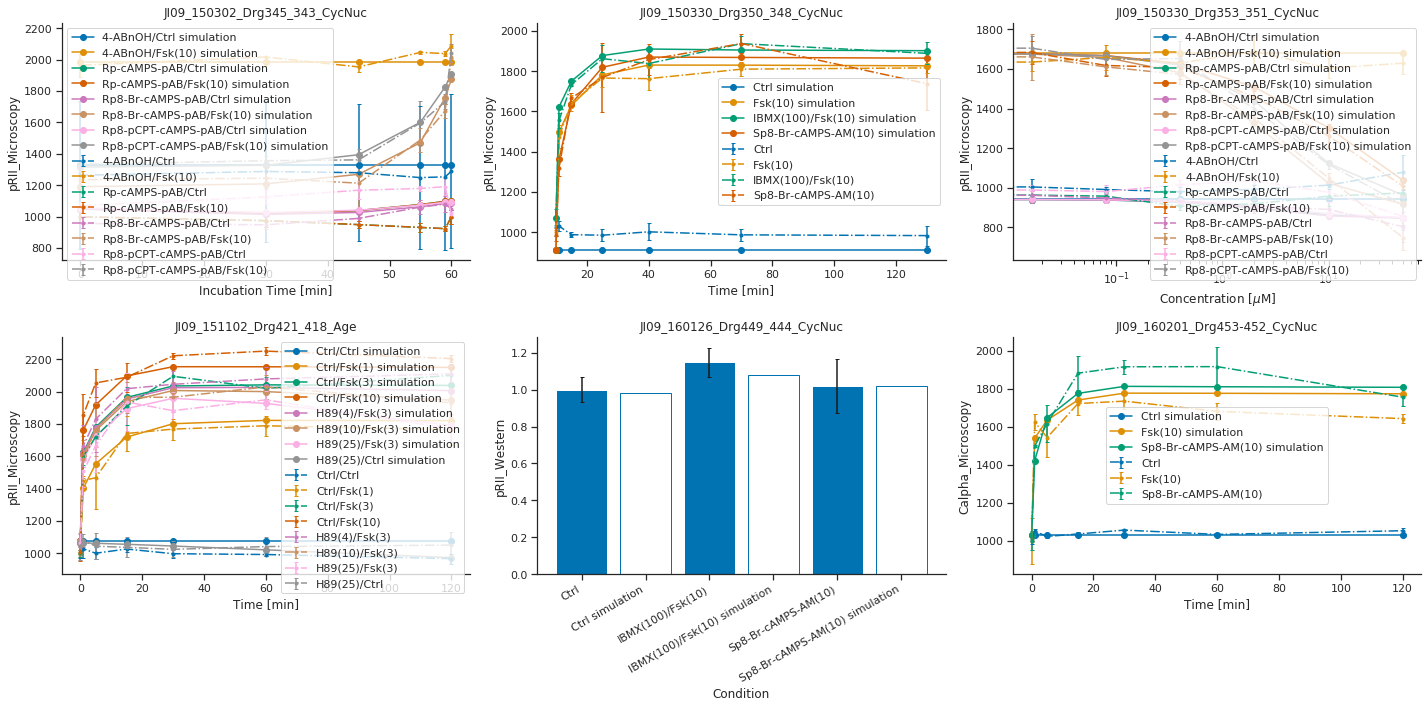

In [2]:
folder = "example_Isensee/"

data_file_path = folder + "Isensee_measurementData.tsv"
condition_file_path = folder + "Isensee_experimentalCondition.tsv"
visualization_file_path = folder + "Isensee_visualizationSpecification.tsv"
simulation_file_path = folder + "Isensee_simulationData.tsv"

# function to call, to plot data and simulations
ax = plot_data_and_simulation(data_file_path,
                              condition_file_path,
                              visualization_file_path,
                              simulation_file_path)
plt.show()

Now, we want to call the plotting routines without using the simulated data, only the visualization specification file.

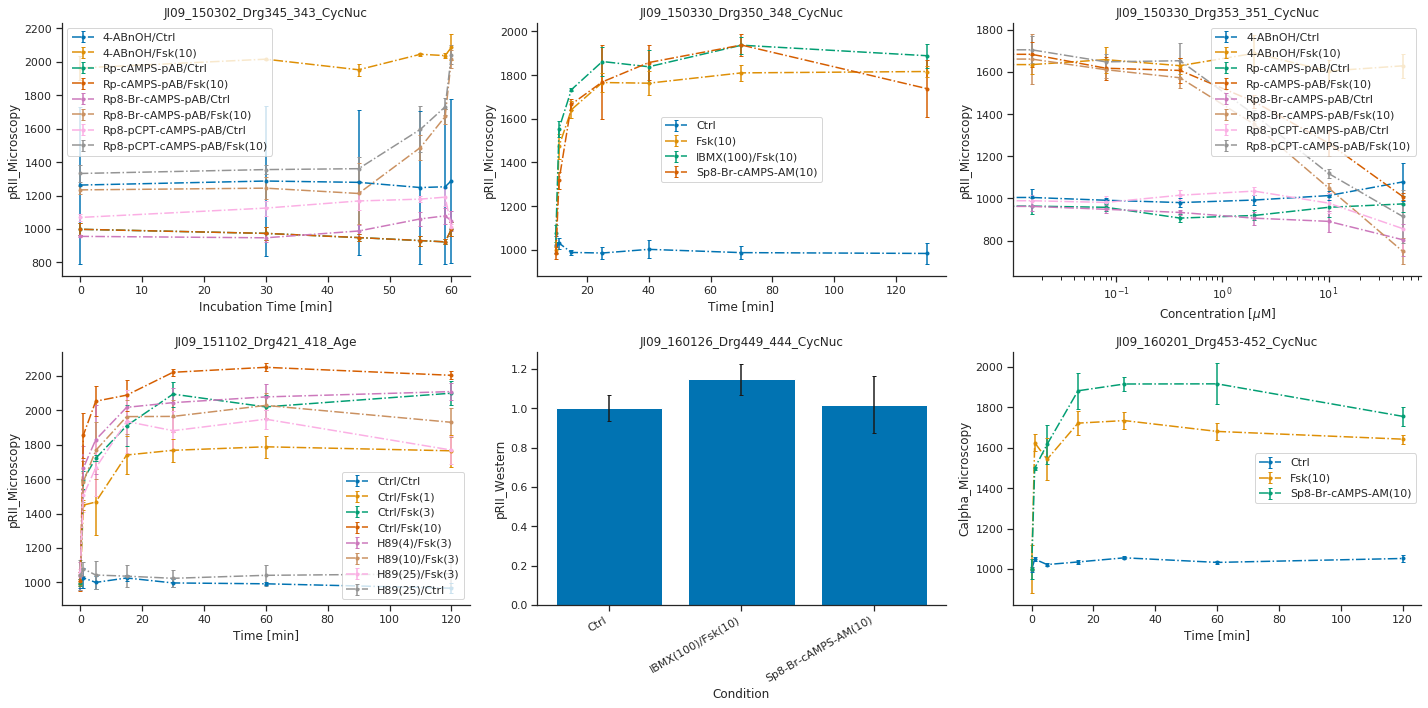

In [3]:
ax_without_sim = plot_data_and_simulation(
    data_file_path,
    condition_file_path,
    visualization_file_path)
plt.show()

We can also call the plotting routine without the visualization specification file, but by passing a list of lists as `dataset_id_list`. Each sublist corresponds to a plot, and contains the datasetIds which should be plotted.
In this simply structured plotting routine, the independent variable will always be time.

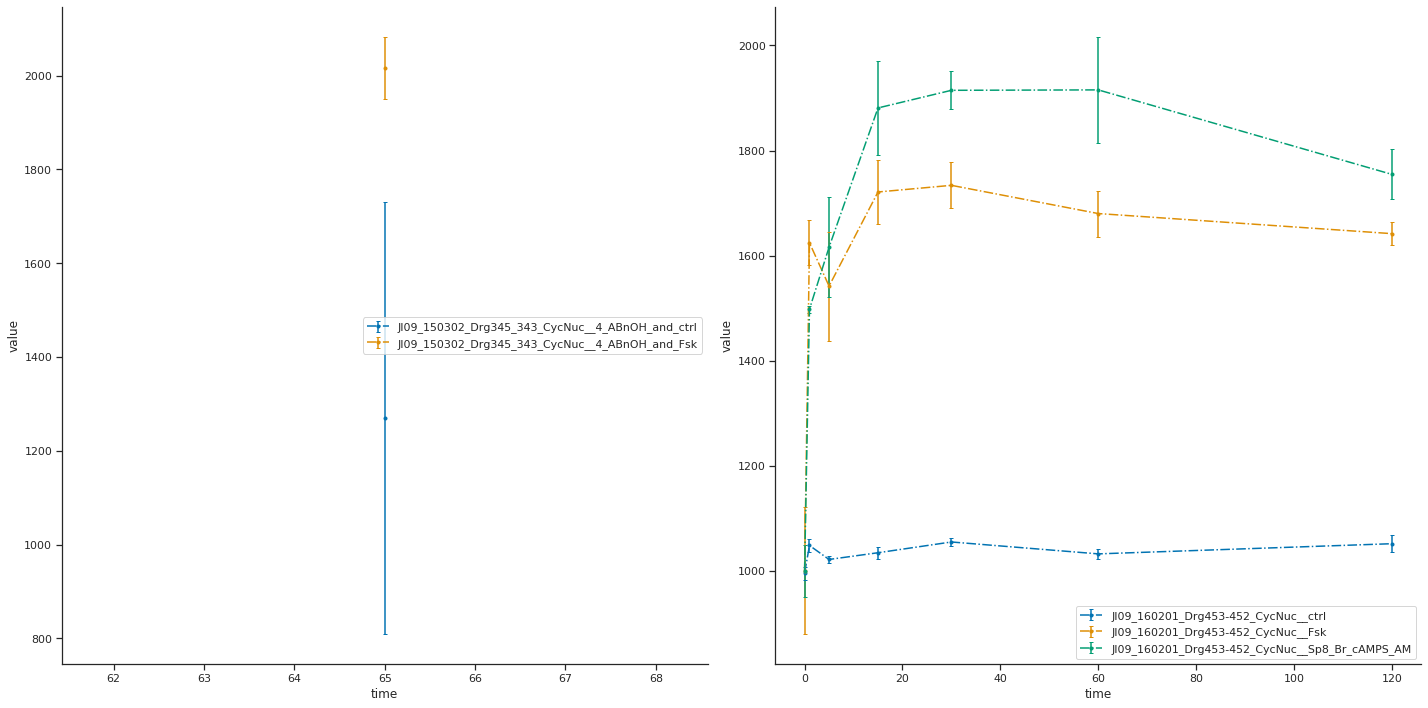

In [4]:
ax_without_sim = plot_data_and_simulation(
    data_file_path,
    condition_file_path,
    dataset_id_list = [['JI09_150302_Drg345_343_CycNuc__4_ABnOH_and_ctrl', 
                        'JI09_150302_Drg345_343_CycNuc__4_ABnOH_and_Fsk'],
                       ['JI09_160201_Drg453-452_CycNuc__ctrl',
                        'JI09_160201_Drg453-452_CycNuc__Fsk',
                        'JI09_160201_Drg453-452_CycNuc__Sp8_Br_cAMPS_AM']])
plt.show()

Let's look more closely at the plotting routines, if no visualization specification file is provided. If such a file is missing, PEtab needs to know how to group the data points. For this, five options can be used:
 * dataset_id_list
 * sim_cond_id_lis
 * sim_cond_num_list
 * observable_id_list
 * observable_num_list

Each of them is a list of lists. Again, each sublist is a plot and its content are either simulation condition IDs or observable IDs (or their corresponding number when being enumerated) or the dataset IDs.

We want to illustrate this functionality by using a simpler example, a model published in 2010 by Fujita et al.

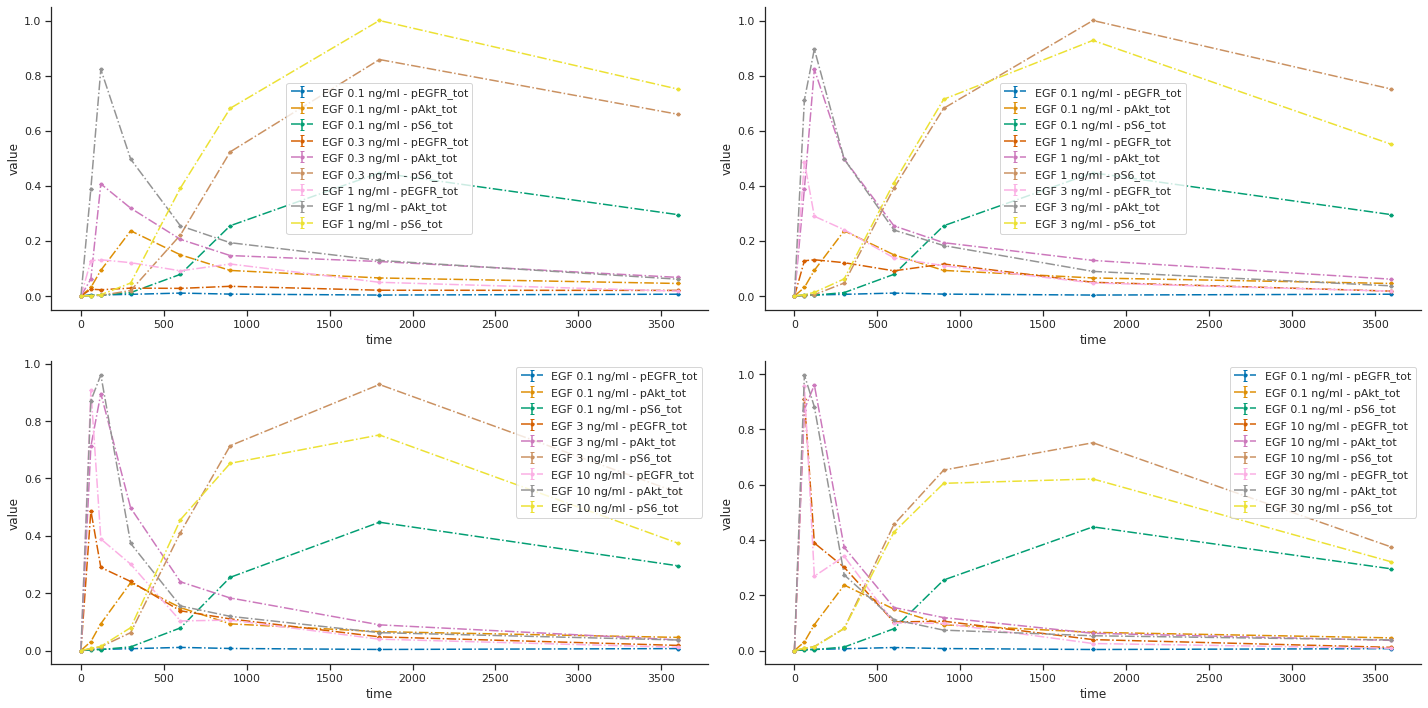

In [5]:
data_file_path = "example_Fujita/Fujita_measurementData.tsv"
condition_file_path = "example_Fujita/Fujita_experimentalCondition.tsv"

# Plot 4 axes objects, plotting 
# - in the first window all observables of the  1st, 2nd, and 3rd simulation condition
# - in the second window all observables of the 1st, 3rd, and 4th simulation condition
# - in the third window all observables of the  1st, 4th, and 5th simulation condition
# - in the fourth window all observables of the 1st, 5th, and 6th simulation condition
plot_data_and_simulation(data_file_path, condition_file_path,
                         sim_cond_num_list = [[0, 1, 2], [0, 2, 3], [0, 3, 4], [0, 4, 5]])
plt.show()

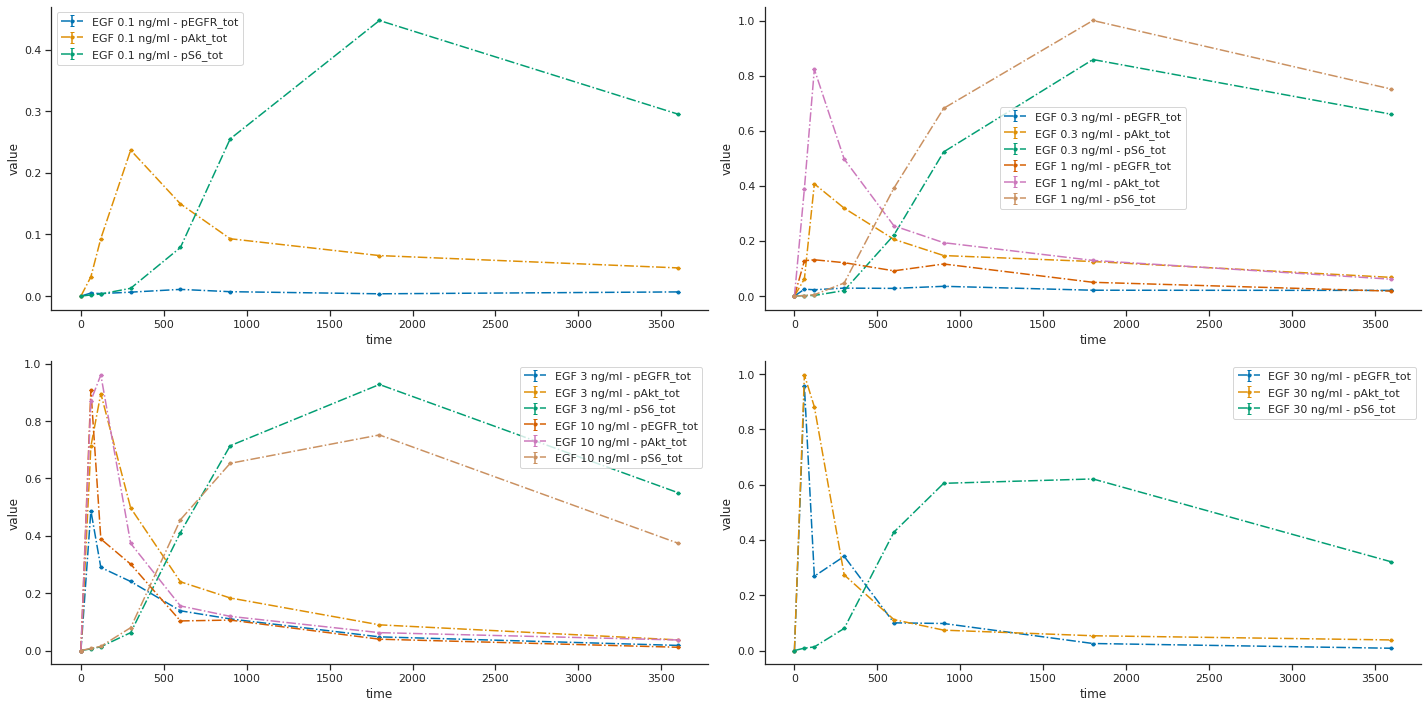

In [6]:
# Plot 4 axes objects, plotting 
# - in the first window  all observables of the simulation condition 'model1_data1'
# - in the second window all observables of the simulation conditions 'model1_data2', 'model1_data3'
# - in the third window  all observables of the simulation conditions 'model1_data4', 'model1_data5'
# - in the fourth window all observables of the simulation condition 'model1_data6'
plot_data_and_simulation(
    data_file_path, condition_file_path,
    sim_cond_id_list = [['model1_data1'], ['model1_data2', 'model1_data3'], 
                        ['model1_data4', 'model1_data5'], ['model1_data6']])
plt.show()

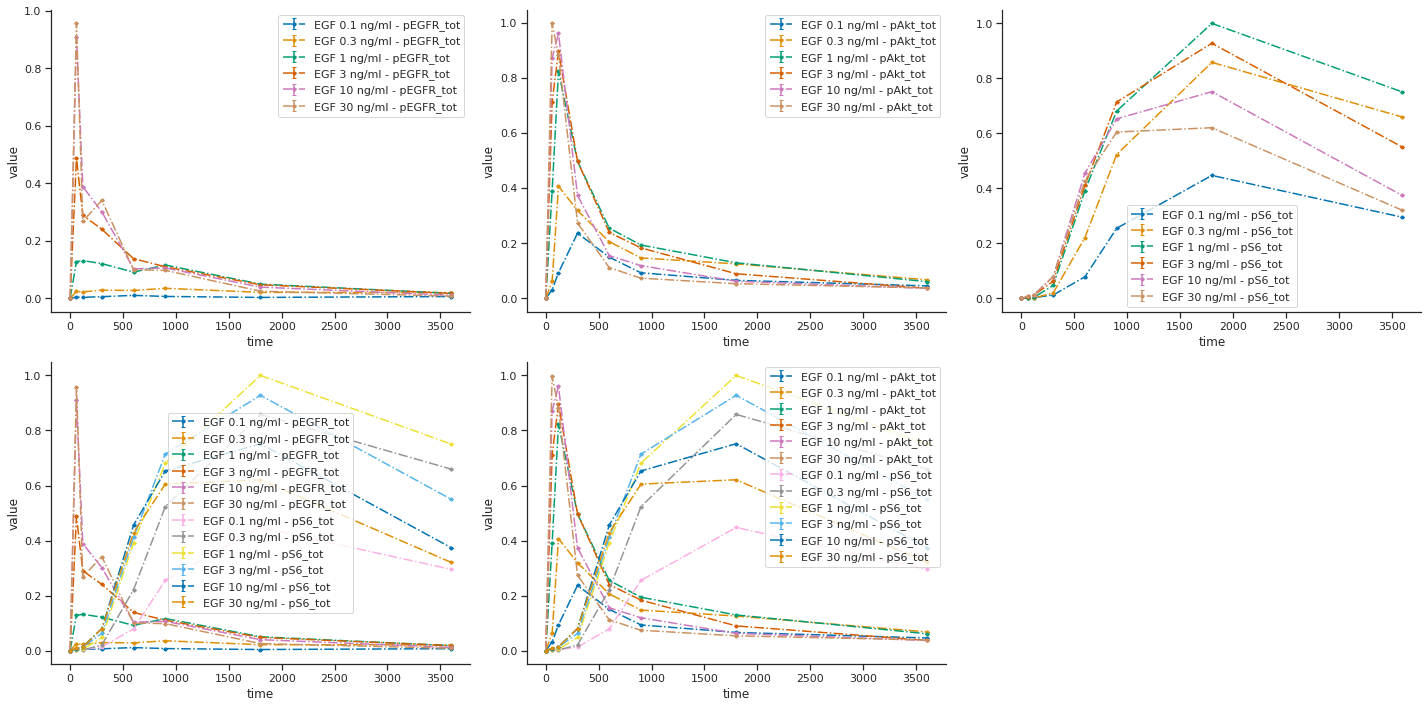

In [7]:
# Plot 5 axes objects, plotting
# - in the first window  the 1st observable for all simulation conditions
# - in the second window the 2nd observable for all simulation conditions
# - in the third window  the 3rd observable for all simulation conditions
# - in the fourth window the 1st and 3rd observable for all simulation conditions
# - in the fifth window  the 2nd and 3rd observable for all simulation conditions
plot_data_and_simulation(
    data_file_path, condition_file_path,
    observable_num_list = [[0], [1], [2], [0, 2], [1, 2]])
plt.show()

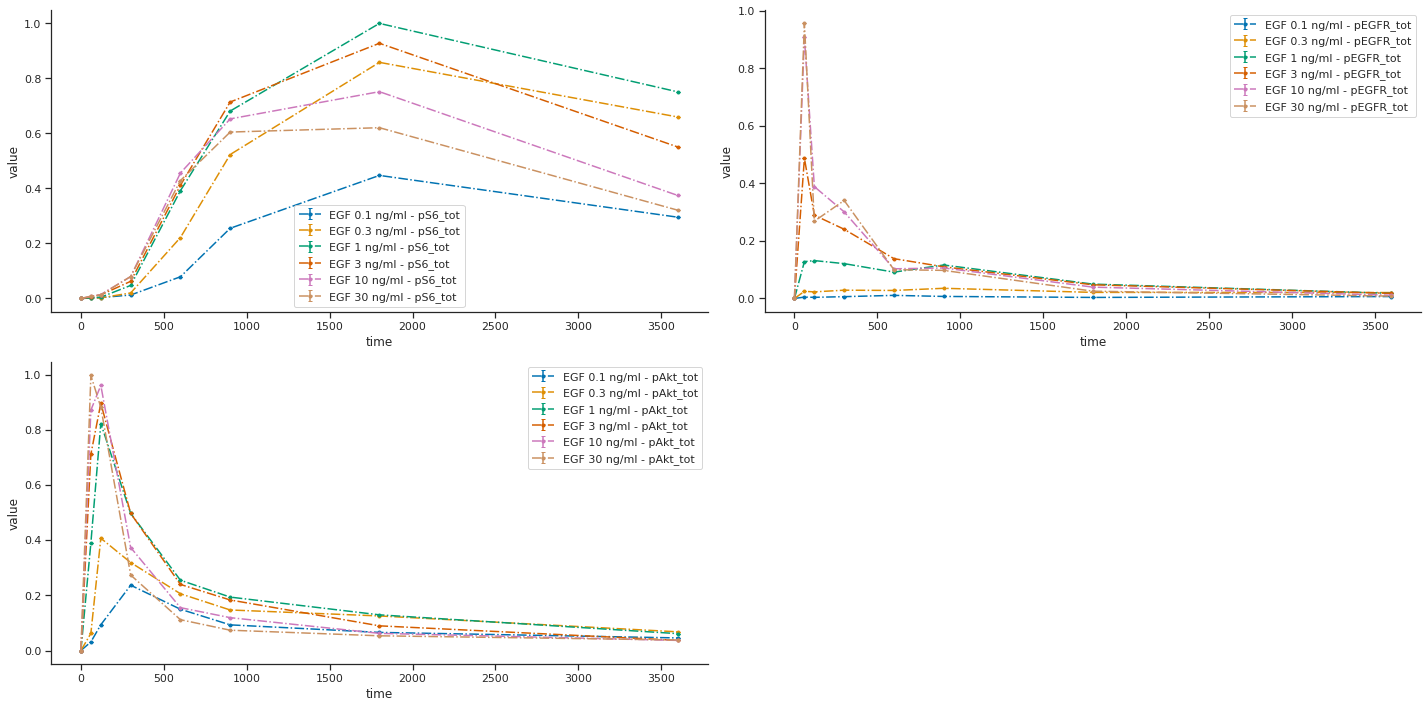

In [8]:
# Plot 3 axes objects, plotting
# - in the first window  the observable 'pS6_tot' for all simulation conditions
# - in the second window the observable 'pEGFR_tot' for all simulation conditions
# - in the third window  the observable 'pAkt_tot' for all simulation conditions

plot_data_and_simulation(
    data_file_path, condition_file_path,
    observable_id_list = [['pS6_tot'], ['pEGFR_tot'], ['pAkt_tot']])
plt.show()

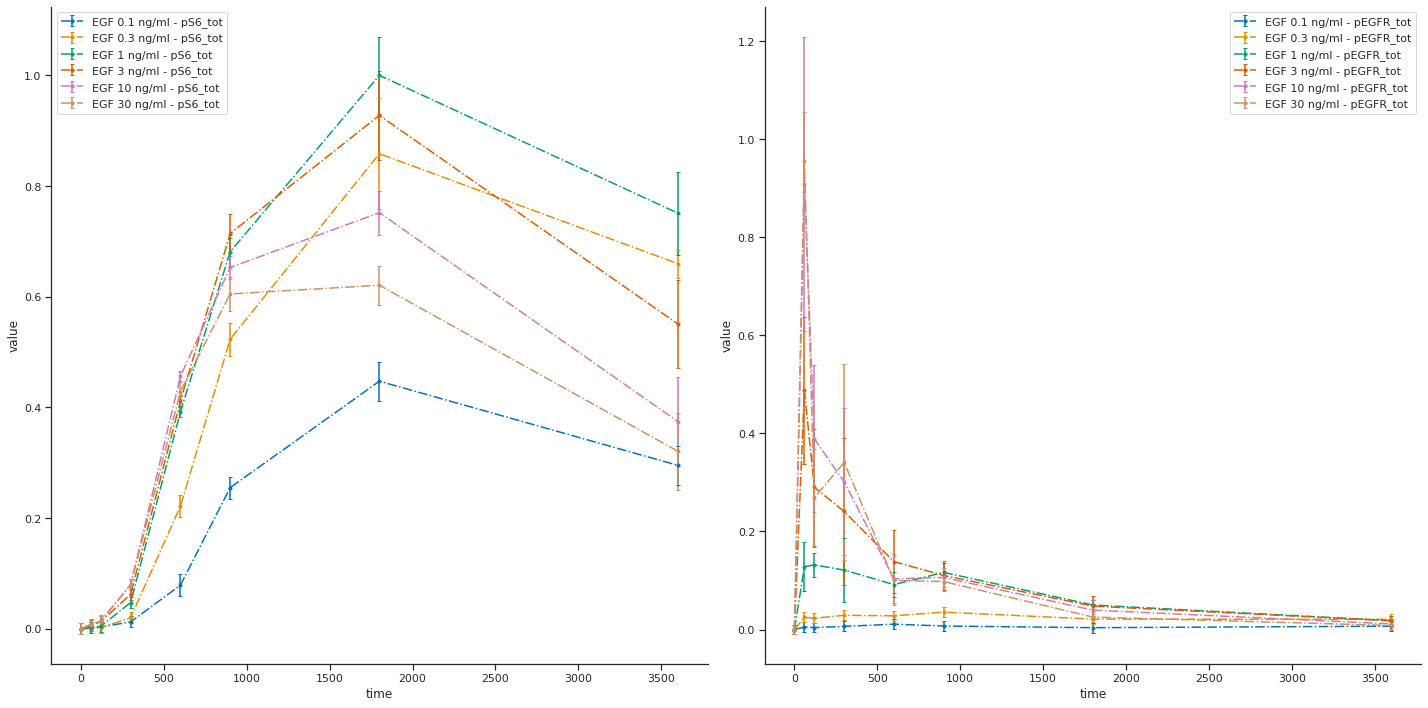

In [9]:
# Plot 2 axes objects, plotting
# - in the first window  the observable 'pS6_tot' for all simulation conditions
# - in the second window the observable 'pEGFR_tot' for all simulation conditions
# - in the third window  the observable 'pAkt_tot' for all simulation conditions
# while using the noise values which are saved in the PEtab files

plot_data_and_simulation(
    data_file_path, condition_file_path,
    observable_id_list = [['pS6_tot'], ['pEGFR_tot']],
    plotted_noise='provided')
plt.show()